In [1]:
# from Helpers import *
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
# os.chdir("C:/Users/Lanceiv/Documents/GEMS/report")

cwd = os.getcwd()
print(cwd)

/home/hamptong2/Stabilization/PDF_Bayes_Freq


In [2]:
data_file = 'TDA_freq_DATA'
exp_date = '02Apr24'
run_head = 'trueStart'
SNR_value = 1000
var_reps = 100000

add_tag = ""

data_name = f"{cwd}/{data_file}/{run_head}_SNR{SNR_value}_iter{var_reps}_{add_tag}{exp_date}.pkl"

NameError: name 'base_file' is not defined

In [ ]:
m = 10000
n = 100
SNR = 1000
TIs = [200, 300, 400, 500, 600, 700, 800, 900]
N_PLOTS = 5
N_PARAMS = 4

In [ ]:
# USED TO GENERATE THE DATA, NO LONGER NEEDED

# datas = np.zeros((len(TIs), N_PLOTS, m, N_PARAMS))
# for i, TI in enumerate(TIs):
#     for j in range(N_PLOTS):
#         data = run_metro_2(TI, m, SNR, verbose = False)
#         datas[i, j] = data

# combined_datas = np.zeros((len(TIs), n*m, N_PARAMS))
# for i, TI in enumerate(TIs):
#     combined_datas[i] = np.concatenate([run_metro_2(TI, m, SNR, verbose = False) for k in range(n)])

# np.save("datas_pc.npy", datas)
# np.save("combined_datas_pc.npy", combined_datas)

In [ ]:
datas = np.load("datas_pc.npy")
combined_datas = np.load("combined_datas_pc.npy")

In [ ]:
def create_huge_figure(datas, fileName = None, dpi = 100, upper_bound = 300):
    # len(TIs) by N_PLOTS + 1 subplots
    fig, axs = plt.subplots(len(TIs), N_PLOTS + 1, figsize = (15, 20))
    fig.subplots_adjust(hspace = 0.6)
    for i in range(len(TIs)):
        # row title to the left, unrotated
        plt.text(-0.6, 0.5, f"TI = {TIs[i]}", fontsize = 15, rotation = 90, ha = 'center', va = 'center', transform = axs[i, 0].transAxes)

        for j in range(N_PLOTS):
            data = datas[i, j]
            axs[i, j].scatter(data[:,2], data[:,3], s = 1, alpha = 0.1)
            axs[i, j].set_xlabel(r"$T_{21}$")
            axs[i, j].set_ylabel(r"$T_{22}$")
            axs[i, j].set_xlim(0, upper_bound)
            axs[i, j].set_ylim(0, upper_bound)
            axs[i, j].set_aspect('equal')


        # use combined data
        axs[i, N_PLOTS].scatter(combined_datas[i][:,2], combined_datas[i][:,3], s = 1, alpha = 0.005)
        axs[i, N_PLOTS].set_title(f"n = {n}", fontsize = 12)
        axs[i, N_PLOTS].set_xlabel(r"$T_{21}$")
        axs[i, N_PLOTS].set_ylabel(r"$T_{22}$")
        axs[i, N_PLOTS].set_xlim(0, upper_bound)
        axs[i, N_PLOTS].set_ylim(0, upper_bound)
        axs[i, N_PLOTS].set_aspect('equal')

    if fileName:
        plt.savefig(fileName, dpi = dpi)


In [ ]:
# create_huge_figure(datas)

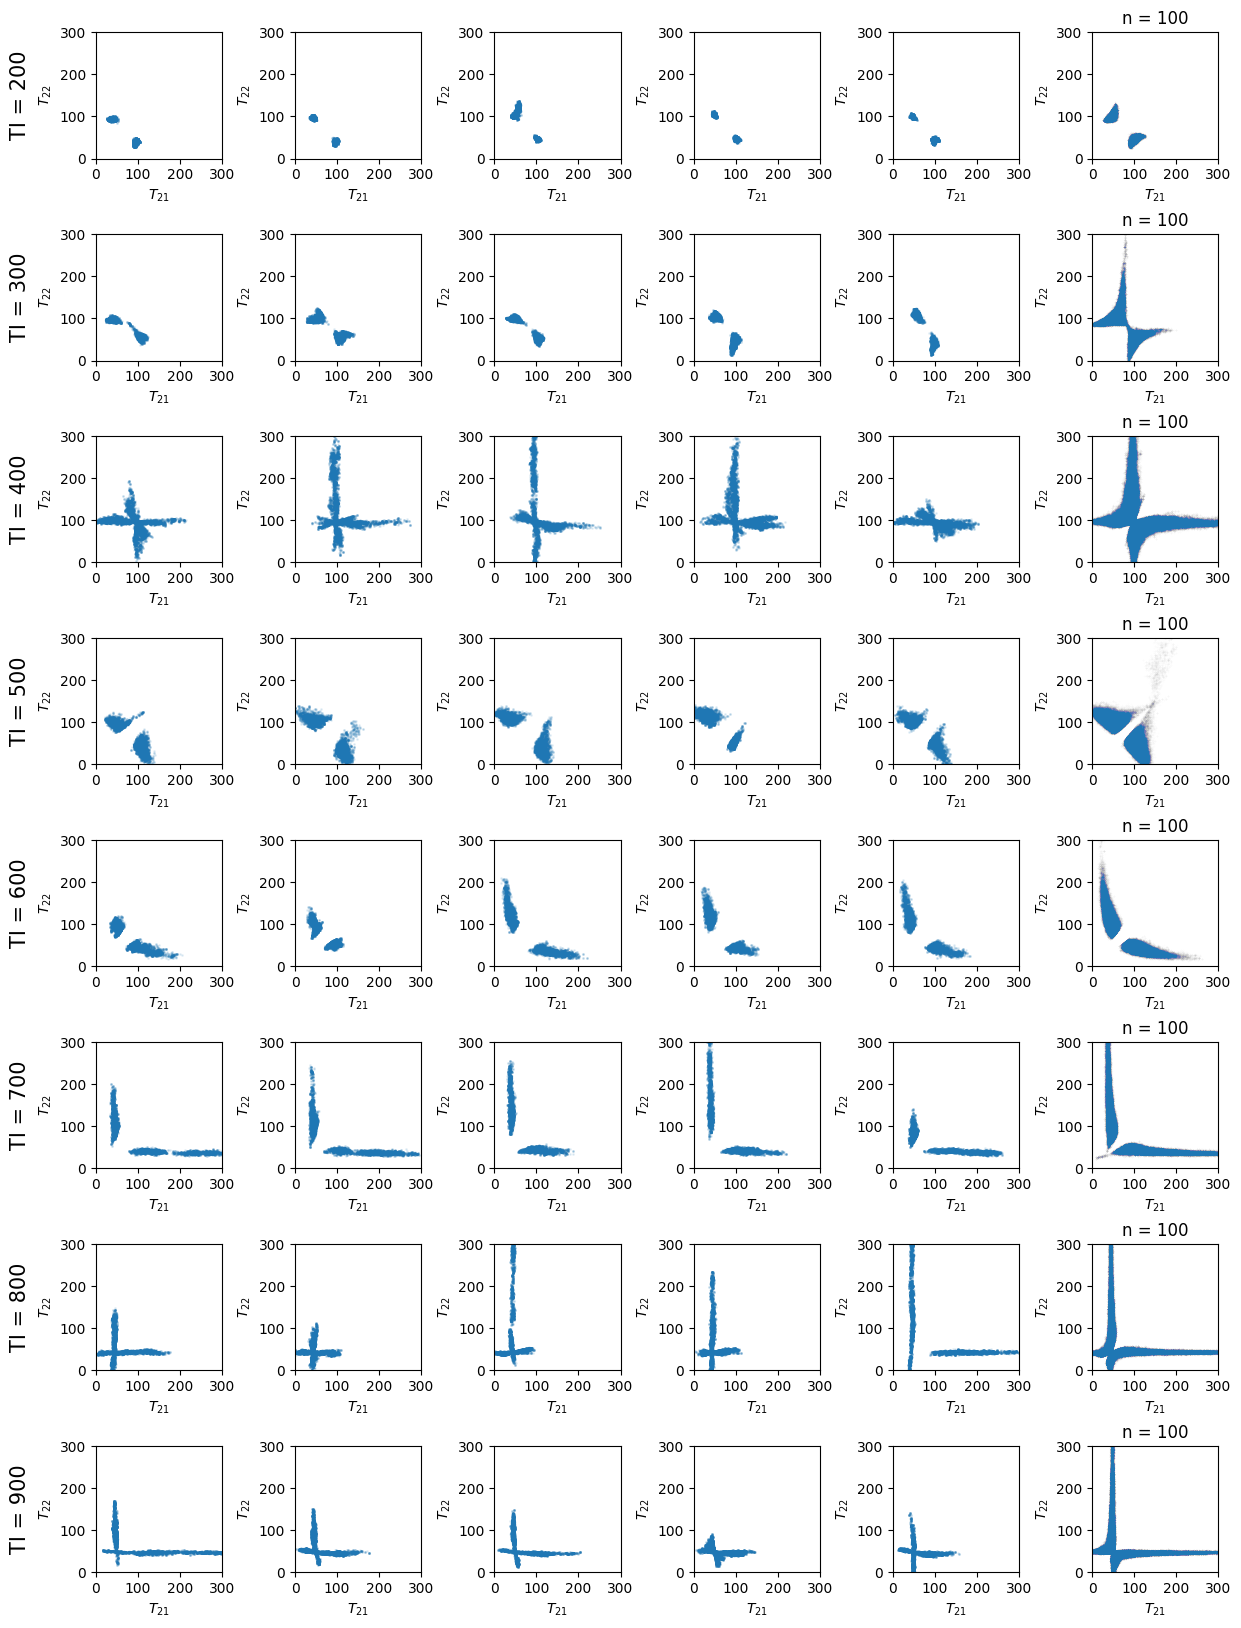

In [ ]:
create_huge_figure(datas, "point_clouds_huge_figure.png", 1000)